A notebook to visualize some of the test systems in the C++ test code in `Code/GraphMol/RGroupDecomposition/testRGroupDecomp.cpp`

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem.rdRGroupDecomposition import RGroupDecomposition, RGroupDecompositionParameters, \
   RGroupMatching, RGroupScore, RGroupLabels, RGroupCoreAlignment
import pandas as pd
from rdkit.Chem import PandasTools
from collections import OrderedDict
from IPython.display import HTML
from rdkit import rdBase
from io import StringIO
from rdkit.Chem import Draw

rdBase.DisableLog("rdApp.debug")

### testSDFGRoupMultiCoreNoneShouldMatch

Cores, compounds and python code 

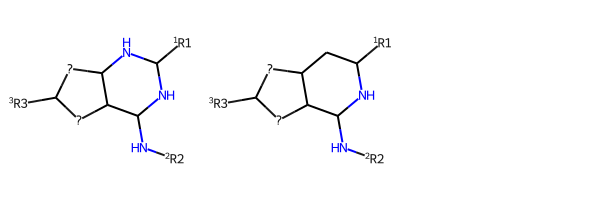

In [2]:
sdcores = """
Mrv1813 05061918272D          

 13 14  0  0  0  0            999 V2000
   -1.1505    0.0026    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1505   -0.8225    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4360   -1.2350    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.2784   -0.8225    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2784    0.0026    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4360    0.4151    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9354    0.2575    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4202   -0.4099    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9354   -1.0775    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    0.9907   -1.2333    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
   -0.4360    1.2373    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.2784    1.6497    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
   -3.2452   -0.4098    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  6  1  1  0  0  0  0
  1  7  1  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  9  2  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  4 10  1  0  0  0  0
  5  6  1  0  0  0  0
  6 11  1  0  0  0  0
  7  8  1  0  0  0  0
  8 13  1  0  0  0  0
  8  9  1  0  0  0  0
 11 12  1  0  0  0  0
M  RGP  3  10   1  12   2  13   3
M  END
$$$$

  Mrv1813 05061918272D          

 13 14  0  0  0  0            999 V2000
    6.9524    0.1684    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.9524   -0.6567    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.6668   -1.0692    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.3813   -0.6567    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.3813    0.1684    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    7.6668    0.5809    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.1674    0.4233    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    5.6827   -0.2441    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.1674   -0.9117    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    9.0935   -1.0675    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
    7.6668    1.4031    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    8.3813    1.8155    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
    4.8576   -0.2440    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  6  1  1  0  0  0  0
  1  7  1  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  9  2  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  4 10  1  0  0  0  0
  5  6  1  0  0  0  0
  6 11  1  0  0  0  0
  7  8  1  0  0  0  0
  8 13  1  0  0  0  0
  8  9  1  0  0  0  0
 11 12  1  0  0  0  0
M  RGP  3  10   1  12   2  13   3
M  END
$$$$)CTAB"""

supplier = Chem.SDMolSupplier()
supplier.SetData(sdcores)
cores = [x for x in supplier]
for core in cores:
    AllChem.Compute2DCoords(core)
Draw.MolsToGridImage(cores)

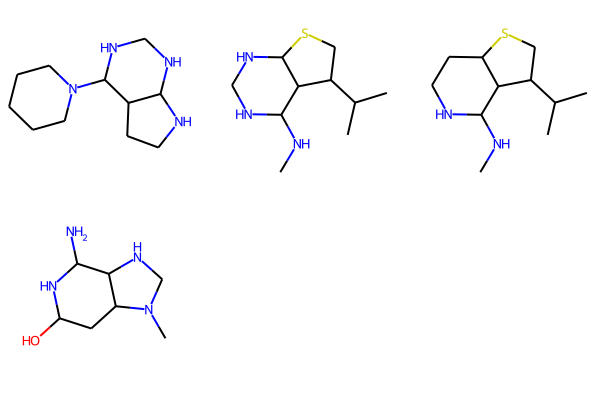

In [3]:
sdmols="""CTAB(
  Mrv1813 05061918322D          

 15 17  0  0  0  0            999 V2000
    0.1742    0.6899    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8886    0.2774    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8886   -0.5476    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1742   -0.9601    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.1742   -1.7851    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8886   -2.1976    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.8886   -3.0226    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1742   -3.4351    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5403   -3.0226    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3249   -3.2775    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8099   -2.6101    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3249   -1.9426    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5403   -2.1976    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5403   -0.5476    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5403    0.2774    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  1 15  1  0  0  0  0
  2  3  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  4 14  1  0  0  0  0
  5  6  1  0  0  0  0
  5 13  1  0  0  0  0
  6  7  1  0  0  0  0
  7  8  1  0  0  0  0
  8  9  1  0  0  0  0
  9 10  1  0  0  0  0
  9 13  1  0  0  0  0
 10 11  1  0  0  0  0
 11 12  1  0  0  0  0
 12 13  1  0  0  0  0
 14 15  1  0  0  0  0
M  END
$$$$

  Mrv1813 05061918322D          

 14 15  0  0  0  0            999 V2000
    6.4368    0.3002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.7223   -0.1123    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.7223   -0.9373    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4368   -1.3498    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.4368   -2.1748    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.7223   -2.5873    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.0078   -2.1748    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.2232   -2.4297    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
    3.7383   -1.7623    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.2232   -1.0949    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9683   -0.3102    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1613   -0.1387    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5203    0.3029    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.0078   -1.3498    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  3  4  1  0  0  0  0
  3 14  1  0  0  0  0
  4  5  1  0  0  0  0
  5  6  1  0  0  0  0
  6  7  1  0  0  0  0
  7  8  1  0  0  0  0
  7 14  1  0  0  0  0
  8  9  1  0  0  0  0
  9 10  1  0  0  0  0
 10 11  1  0  0  0  0
 10 14  1  0  0  0  0
 11 13  1  0  0  0  0
 11 12  1  0  0  0  0
M  END
$$$$

  Mrv1813 05061918322D          

 14 15  0  0  0  0            999 V2000
    0.8289   -7.9643    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1144   -8.3768    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.1144   -9.2018    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8289   -9.6143    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.8289  -10.4393    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1144  -10.8518    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6000  -10.4393    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3847  -10.6942    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8696  -10.0268    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3847   -9.3593    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6396   -8.5747    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4466   -8.4032    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0876   -7.9616    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6000   -9.6143    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  3  4  1  0  0  0  0
  3 14  1  0  0  0  0
  4  5  1  0  0  0  0
  5  6  1  0  0  0  0
  6  7  1  0  0  0  0
  7  8  1  0  0  0  0
  7 14  1  0  0  0  0
  8  9  1  0  0  0  0
  9 10  1  0  0  0  0
 10 11  1  0  0  0  0
 10 14  1  0  0  0  0
 11 13  1  0  0  0  0
 11 12  1  0  0  0  0
M  END
$$$$

  Mrv1813 05061918322D          

 12 13  0  0  0  0            999 V2000
    5.3295   -8.1871    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.5844   -7.4025    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.0995   -6.7351    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.5844   -6.0676    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.3690   -6.3226    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.0835   -5.9101    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.0835   -5.0851    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    7.7980   -6.3226    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    7.7980   -7.1476    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.5124   -7.5601    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.0835   -7.5601    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.3690   -7.1476    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  2 12  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  5 12  1  0  0  0  0
  5  6  1  0  0  0  0
  6  7  1  0  0  0  0
  6  8  1  0  0  0  0
  8  9  1  0  0  0  0
  9 10  1  0  0  0  0
  9 11  1  0  0  0  0
 11 12  1  0  0  0  0
M  END
$$$$)CTAB"""
supplier = Chem.SDMolSupplier()
supplier.SetData(sdmols)
mols = [x for x in supplier]
for mol in mols:
    AllChem.Compute2DCoords(mol)
Draw.MolsToGridImage(mols)

,Core,R1,R2,R4,R5,mol
0,,,,,,
1,,,,,,
2,,,,,,
3,,,,,,

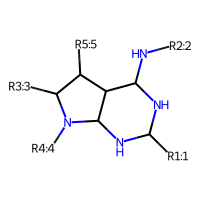
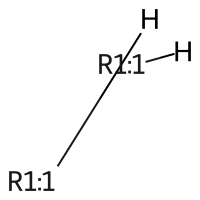
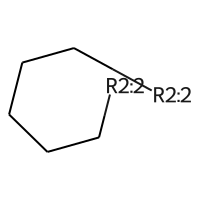
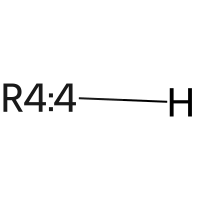
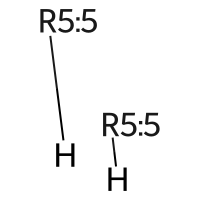
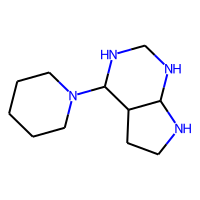
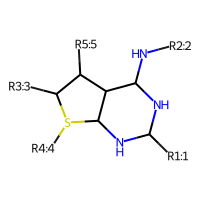
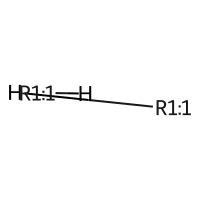
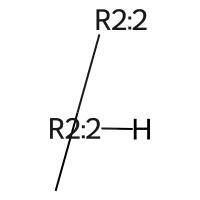
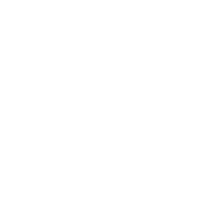
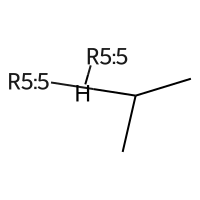
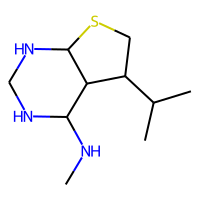
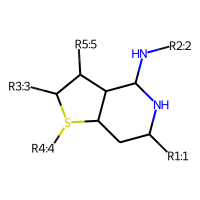
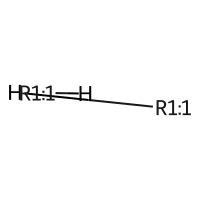
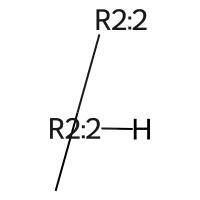
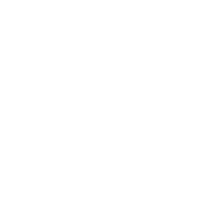
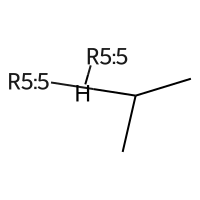
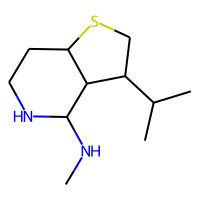
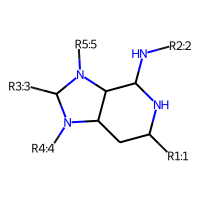
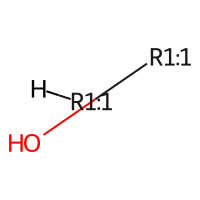
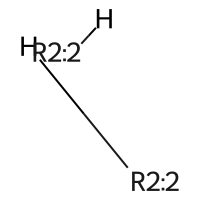
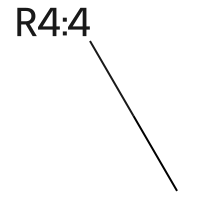
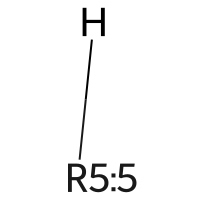
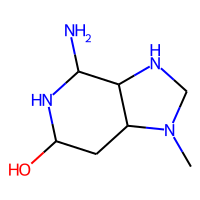

In [4]:
options = RGroupDecompositionParameters()
options.onlyMatchAtRGroups = False
options.removeHydrogensPostMatch = True
decomp = RGroupDecomposition(cores, options)
display_mols = []
for mol in mols:
    if decomp.Add(mol) != -1:
        display_mols.append(mol)
decomp.Process()
cols= decomp.GetRGroupsAsColumns()
cols['mol'] = display_mols
for c in cols['Core']:
     AllChem.Compute2DCoords(c)
Draw.MolsToGridImage(cols['Core'])

df = pd.DataFrame(cols);
PandasTools.ChangeMoleculeRendering(df)
HTML(df.to_html())


In [5]:
rows = decomp.GetRGroupsAsRows();
for i, r in enumerate(rows):
    labels = ['{}:{}'.format(l, Chem.MolToSmiles(r[l])) for l in r]
    #print('{} {}'.format(str(i+1), ' '.join(labels)))
    print('"{}",'.format(' '.join(labels)))

"Core:N1C(N[*:2])C2C([*:5])C([*:3])N([*:4])C2NC1[*:1] R1:[H][*:1].[H][*:1] R2:C(CC[*:2])CC[*:2] R4:[H][*:4] R5:[H][*:5].[H][*:5]",
"Core:N1C(N[*:2])C2C([*:5])C([*:3])S([*:4])C2NC1[*:1] R1:[H][*:1].[H][*:1] R2:C[*:2].[H][*:2] R5:CC(C)[*:5].[H][*:5]",
"Core:C1C2C(C([*:5])C([*:3])S2[*:4])C(N[*:2])NC1[*:1] R1:[H][*:1].[H][*:1] R2:C[*:2].[H][*:2] R5:CC(C)[*:5].[H][*:5]",
"Core:C1C2C(C(N[*:2])NC1[*:1])N([*:5])C([*:3])N2[*:4] R1:O[*:1].[H][*:1] R2:[H][*:2].[H][*:2] R4:C[*:4] R5:[H][*:5]",


### testMultiCorePreLabelled

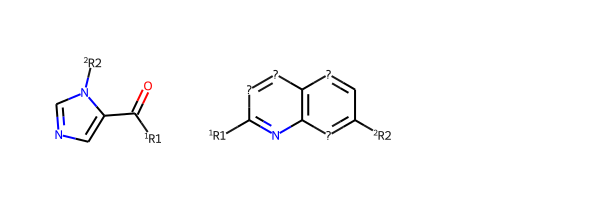

In [6]:
sdcores = """CTAB(
     RDKit          2D

  9  9  0  0  0  0  0  0  0  0999 V2000
    1.1100   -1.3431    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5225   -0.6286    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9705   -0.0156    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2168   -0.3511    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.3029   -1.1716    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1419    0.7914    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5289    1.3431    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.9266    1.0463    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
   -0.4976    0.0613    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  4  5  1  0
  1  5  2  0
  3  6  1  0
  6  7  2  0
  6  8  1  0
  4  9  1  0
M  RGP  2   8   1   9   2
V    8 *
V    9 *
M  END
$$$$

     RDKit          2D

 12 13  0  0  0  0  0  0  0  0999 V2000
   -6.5623    0.3977    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
   -5.8478   -0.0147    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1333    0.3977    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4188   -0.0147    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4188   -0.8397    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1333   -1.2522    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -5.8478   -0.8397    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7044   -1.2522    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7044    0.3977    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9899   -0.0147    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9899   -0.8397    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2754    0.3978    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  3  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  2  3  2  0
  2  7  1  0
  9 10  2  0
 10 11  1  0
  8 11  2  0
  8  5  1  0
  4  9  1  0
 10 12  1  0
  1  2  1  0
M  RGP  2   1   2  12   1
V    1 *
V   12 *
M  END
$$$$
)CTAB"""

supplier = Chem.SDMolSupplier()
supplier.SetData(sdcores)
cores = [x for x in supplier]
for core in cores:
    AllChem.Compute2DCoords(core)
Draw.MolsToGridImage(cores)

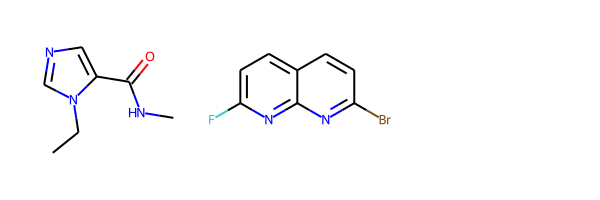

In [7]:
smiles = ["CNC(=O)C1=CN=CN1CC", "Fc1ccc2ccc(Br)nc2n1"]
mols = [Chem.MolFromSmiles(s) for s in smiles]
Draw.MolsToGridImage(mols)

In [8]:

def decomp(options):
    options.removeHydrogensPostMatch = True
    decomp = RGroupDecomposition(cores, options)
    for mol in mols:
        decomp.Add(mol)
    decomp.Process()
    cols = decomp.GetRGroupsAsColumns()
    return cols

def show_decomp(cols):
    cols['mol'] = mols
    df = pd.DataFrame(cols);
    PandasTools.ChangeMoleculeRendering(df)
    return HTML(df.to_html())

# for when we can't display structures ("non-ring aromatic")
def show_decomp_smiles(cols):
    cols['mol'] = mols
    for c in cols:
        cols[c] = ['{}:{}'.format(c, Chem.MolToSmiles(m)) for m in cols[c]]
    df = pd.DataFrame(cols);
    PandasTools.ChangeMoleculeRendering(df)
    return HTML(df.to_html())

def print_rows(options):
    decomp = RGroupDecomposition(cores, options)
    for mol in mols:
        decomp.Add(mol)
    decomp.Process()
    rows = decomp.GetRGroupsAsRows()
    for i, r in enumerate(rows):
        labels = ['{}:{}'.format(l, Chem.MolToSmiles(r[l])) for l in r]
        #print('{} {}'.format(str(i+1), ' '.join(labels)))
        print('"{}",'.format(' '.join(labels)))
    


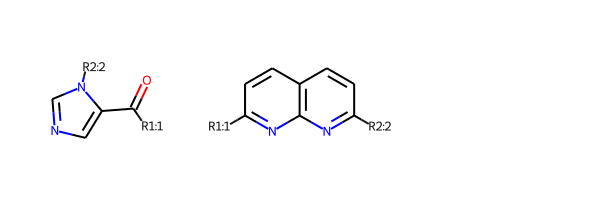

In [9]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.AutoDetect
options.alignment = RGroupCoreAlignment.MCS
options.onlyMatchAtRGroups = True
cols = decomp(options)
Draw.MolsToGridImage(cols['Core'])

,Core,R1,R2,mol
0,,,,
1,,,,

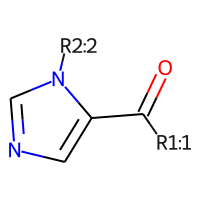
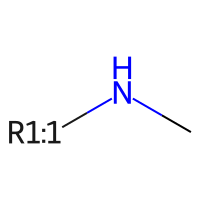
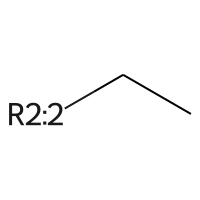
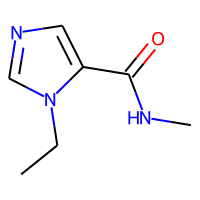
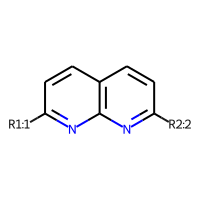
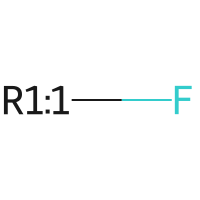
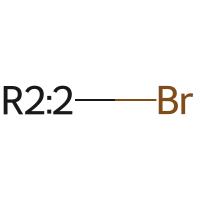
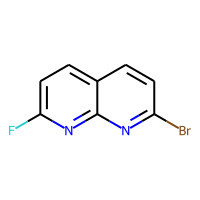

In [10]:
show_decomp(cols)

In [11]:
print_rows(options)

"Core:O=C(c1cncn1[*:2])[*:1] R1:CN[*:1] R2:CC[*:2]",
"Core:c1cc2ccc([*:2])nc2nc1[*:1] R1:F[*:1] R2:Br[*:2]",


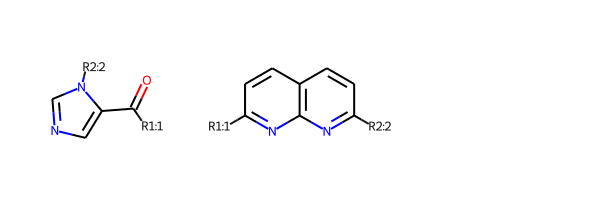

In [12]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.MDLRGroupLabels | RGroupLabels.RelabelDuplicateLabels
options.alignment = RGroupCoreAlignment.MCS
options.onlyMatchAtRGroups = True
cols=decomp(options)
Draw.MolsToGridImage(cols['Core'])

,Core,R1,R2,mol
0,,,,
1,,,,

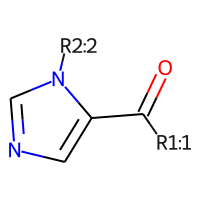
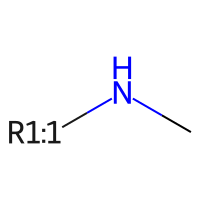
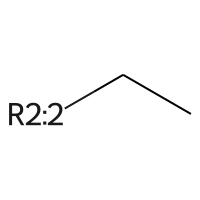
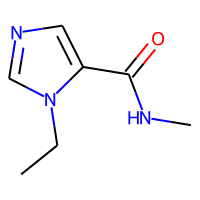
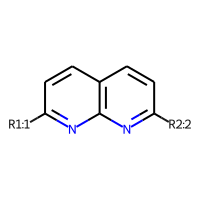
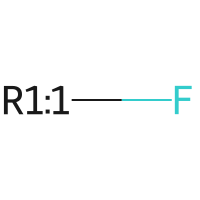
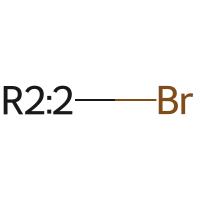
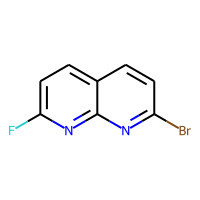

In [13]:
show_decomp(cols)

In [14]:
print_rows(options)

"Core:O=C(c1cncn1[*:2])[*:1] R1:CN[*:1] R2:CC[*:2]",
"Core:c1cc2ccc([*:2])nc2nc1[*:1] R1:F[*:1] R2:Br[*:2]",


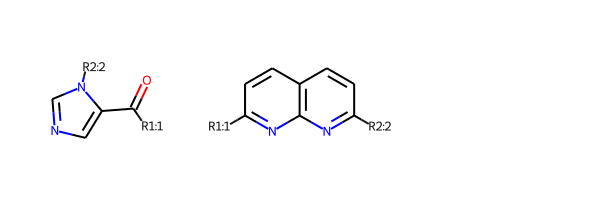

In [15]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.AutoDetect
options.alignment = RGroupCoreAlignment.NoAlignment
options.onlyMatchAtRGroups = True
cols=decomp(options)
Draw.MolsToGridImage(cols['Core'])

,Core,R1,R2,mol
0,,,,
1,,,,

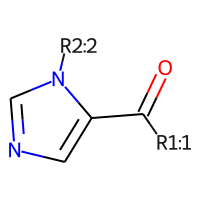
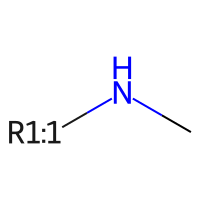
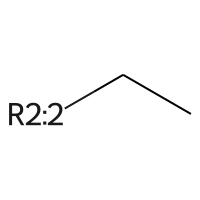
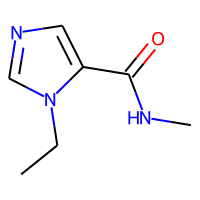
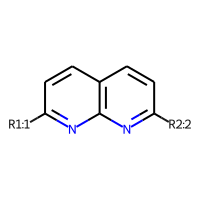
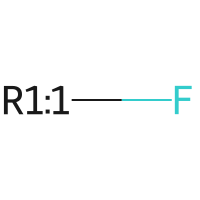
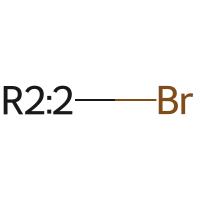
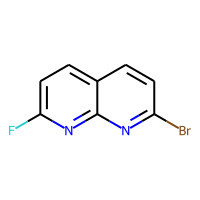

In [16]:
show_decomp(cols)

In [17]:
print_rows(options)

"Core:O=C(c1cncn1[*:2])[*:1] R1:CN[*:1] R2:CC[*:2]",
"Core:c1cc2ccc([*:2])nc2nc1[*:1] R1:F[*:1] R2:Br[*:2]",


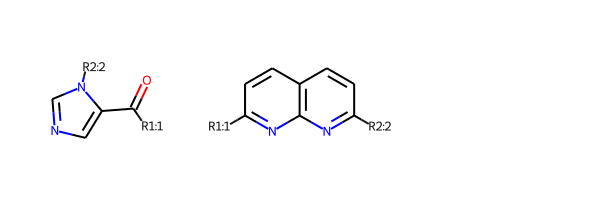

In [18]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.MDLRGroupLabels | RGroupLabels.RelabelDuplicateLabels
options.alignment = RGroupCoreAlignment.NoAlignment
options.onlyMatchAtRGroups = True
cols=decomp(options)
Draw.MolsToGridImage(cols['Core'])

,Core,R1,R2,mol
0,,,,
1,,,,

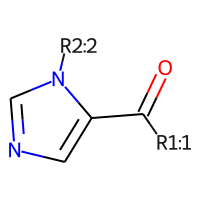
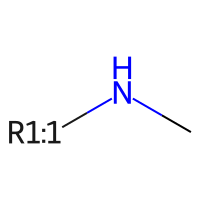
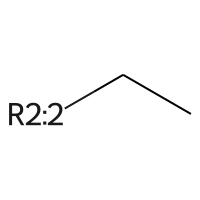
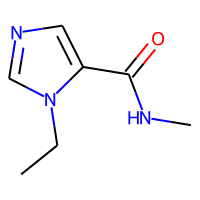
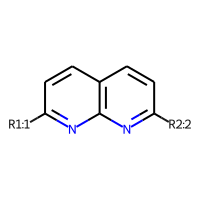
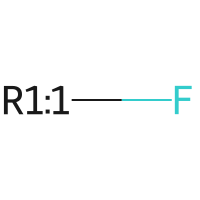
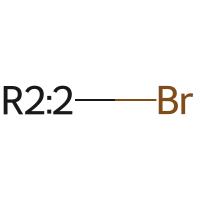
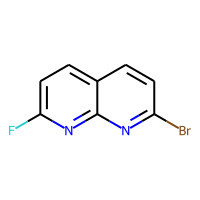

In [19]:
show_decomp(cols)

In [20]:
print_rows(options)

"Core:O=C(c1cncn1[*:2])[*:1] R1:CN[*:1] R2:CC[*:2]",
"Core:c1cc2ccc([*:2])nc2nc1[*:1] R1:F[*:1] R2:Br[*:2]",


In [21]:
for core in cores:
    for atom in core.GetAtoms():
         if atom.HasProp("_MolFileRLabel"):
            atom.ClearProp("_MolFileRLabel")
         if atom.GetIsotope():
            atom.SetIsotope(0)
         if atom.GetAtomMapNum():
            print("atom map num")
            atom.SetAtomMapNum(0)
         

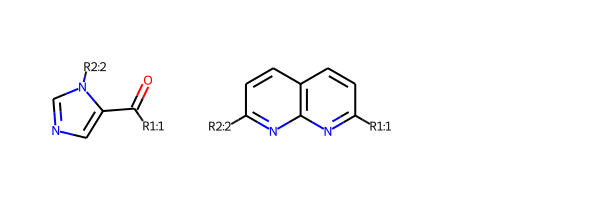

In [22]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.AutoDetect
options.alignment = RGroupCoreAlignment.MCS
options.onlyMatchAtRGroups = True
cols=decomp(options)
Draw.MolsToGridImage(cols['Core'])

,Core,R1,R2,mol
0,,,,
1,,,,

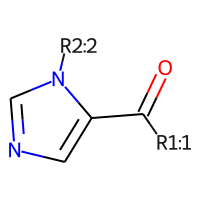
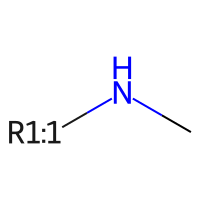
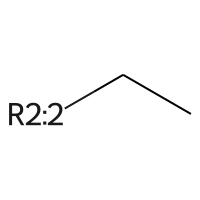
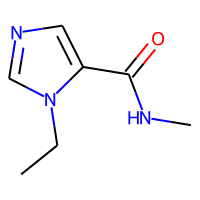
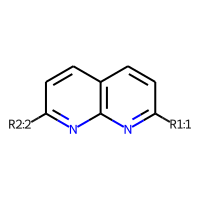
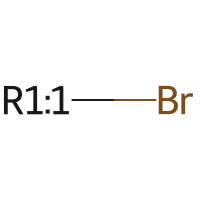
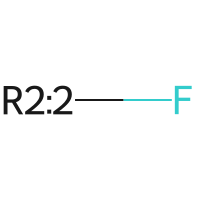
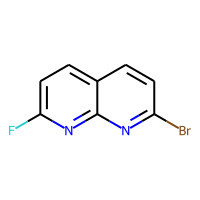

In [23]:
show_decomp(cols)

In [24]:
print_rows(options)

"Core:O=C(c1cncn1[*:2])[*:1] R1:CN[*:1] R2:CC[*:2]",
"Core:c1cc2ccc([*:1])nc2nc1[*:2] R1:Br[*:1] R2:F[*:2]",


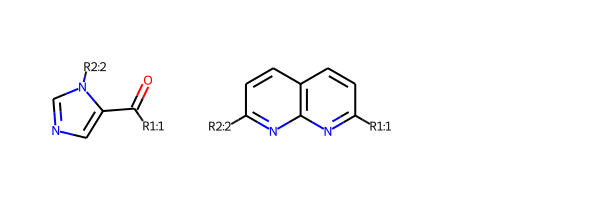

In [25]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.DummyAtomLabels | RGroupLabels.RelabelDuplicateLabels
options.alignment = RGroupCoreAlignment.MCS
options.onlyMatchAtRGroups = True
cols=decomp(options)
Draw.MolsToGridImage(cols['Core'])

,Core,R1,R2,mol
0,,,,
1,,,,

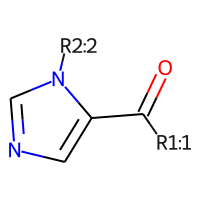
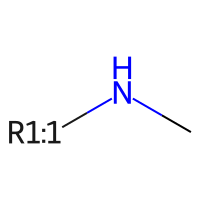
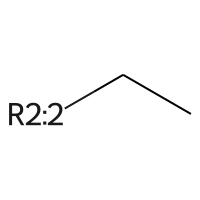
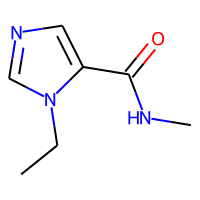
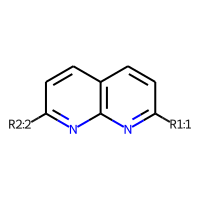
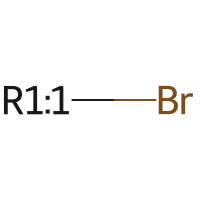
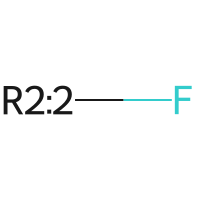
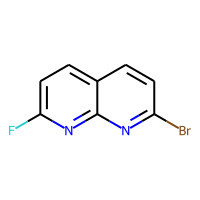

In [26]:
show_decomp(cols)

In [27]:
print_rows(options)

"Core:O=C(c1cncn1[*:2])[*:1] R1:CN[*:1] R2:CC[*:2]",
"Core:c1cc2ccc([*:1])nc2nc1[*:2] R1:Br[*:1] R2:F[*:2]",


### testMatchOnAnyAtom

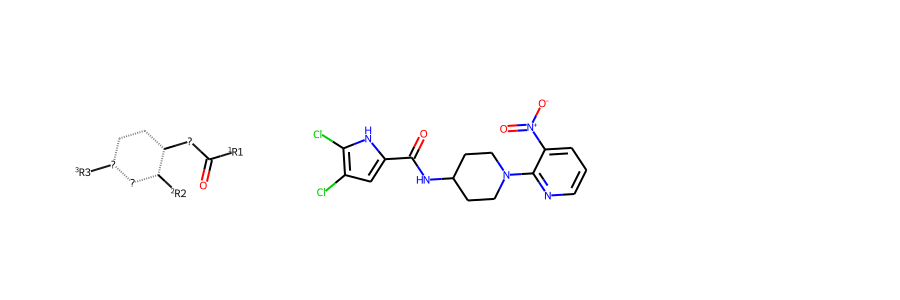

In [28]:
block="""
  Mrv2008 01192109352D          

 12 12  0  0  0  0            999 V2000
    3.7389   -3.2028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5640   -3.2028    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    4.9764   -2.4884    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    4.5640   -1.7739    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7389   -1.7739    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.3265   -2.4884    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5015   -2.4884    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    3.3265   -3.9172    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
    5.8014   -2.4884    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
    2.0890   -1.7739    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5015   -1.0595    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.2640   -1.7739    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  5  6  8  0  0  0  0
  4  5  8  0  0  0  0
  3  4  8  0  0  0  0
  2  3  8  0  0  0  0
  1  2  8  0  0  0  0
  1  6  8  0  0  0  0
  6  7  1  0  0  0  0
  1  8  1  0  0  0  0
  3  9  1  0  0  0  0
  7 10  1  0  0  0  0
 10 11  2  0  0  0  0
 10 12  1  0  0  0  0
M  RGP  3   8   2   9   3  12   1
M  END
"""
core=Chem.MolFromMolBlock(block)
AllChem.Compute2DCoords(core)
smiles = 'O=C(NC1CCN(c2ncccc2[N+](=O)[O-])CC1)c1cc(Cl)c(Cl)[nH]1'
cores = [core]
mols = [Chem.MolFromSmiles(smiles)]
Draw.MolsToGridImage([cores[0], mols[0]], subImgSize=(300, 300))

,Core,R1,R3,mol
0,,,,

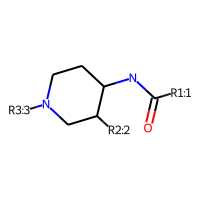
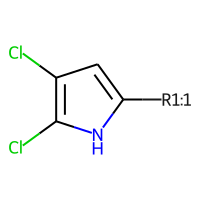
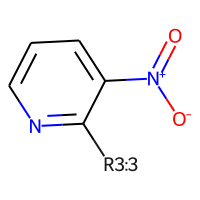
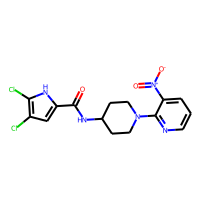

In [29]:
options = RGroupDecompositionParameters()
options.onlyMatchAtRGroups = False
cols=decomp(options)
show_decomp(cols)

In [30]:
print_rows(options)

"Core:O=C(NC1CCN([*:3])CC1[*:2])[*:1] R1:Clc1cc([*:1])[nH]c1Cl R3:O=[N+]([O-])c1cccnc1[*:3]",


,Core,R1,R3,mol
0,,,,

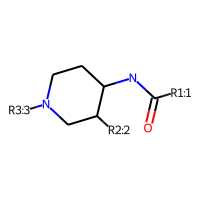
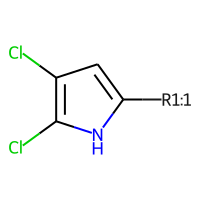
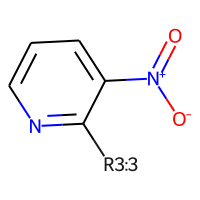
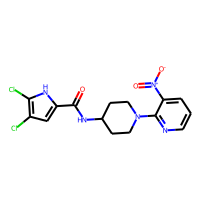

In [31]:
options = RGroupDecompositionParameters()
options.onlyMatchAtRGroups = True
cols=decomp(options)
show_decomp(cols)

In [32]:
print_rows(options)

"Core:O=C(NC1CCN([*:3])CC1[*:2])[*:1] R1:Clc1cc([*:1])[nH]c1Cl R3:O=[N+]([O-])c1cccnc1[*:3]",


### testRingMatching3

,Core,R1,R2,mol
0,,,,
1,,,,
2,,,,

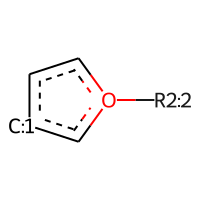
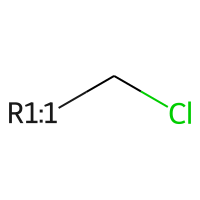
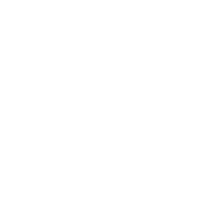
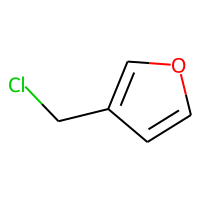
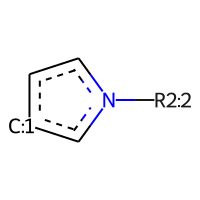
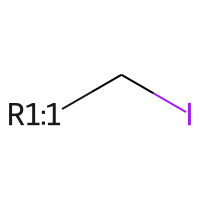
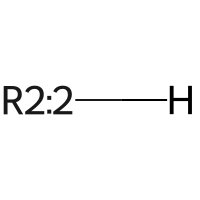
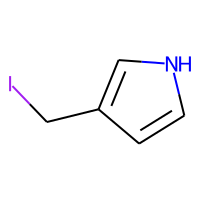
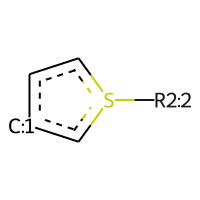
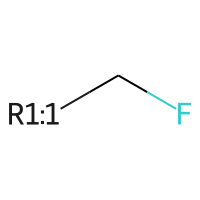
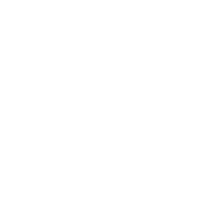
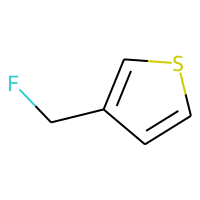

In [33]:
cores = [Chem.MolFromSmarts("*1***[*:1]1")]
#cores = [Chem.MolFromSmarts("*1****1")]
smi = ["c1cocc1CCl", "c1c[nH]cc1CI", "c1cscc1CF"]
mols = [Chem.MolFromSmiles(s) for s in smi]
options = RGroupDecompositionParameters()
options.scoreMethod = RGroupScore.FingerprintDistance
options.onlyMatchAtRGroups = False
cols=decomp(options)
show_decomp(cols)

In [34]:
print_rows(options)

"Core:c1c[c:1]co1[*:2] R1:ClC[*:1]",
"Core:c1c[c:1]cn1[*:2] R1:IC[*:1] R2:[H][*:2]",
"Core:c1c[c:1]cs1[*:2] R1:FC[*:1]",


### testGithub3402

,Core,R1,mol
0,,,

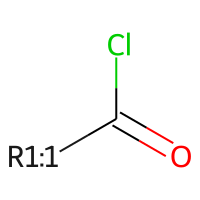
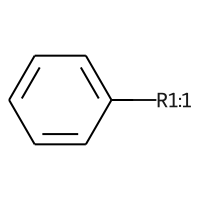
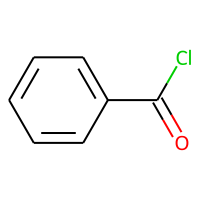

In [35]:
cores = [Chem.MolFromSmarts("[$(C-!@[a])](=O)(Cl)")]
mols = [Chem.MolFromSmiles("c1ccccc1C(=O)Cl")]
options = RGroupDecompositionParameters()
cols=decomp(options)
show_decomp(cols)
        

In [36]:
print_rows(options)

"Core:O=C(Cl)[*:1] R1:c1ccc([*:1])cc1",


### singleAtomBridge

,Core,R1,R2,mol
0,,,,

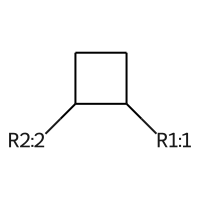
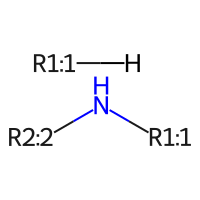
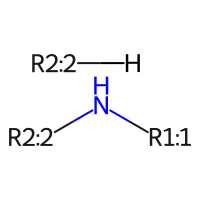
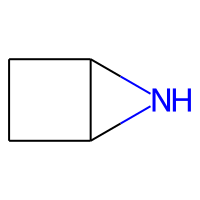

In [37]:
mols = [Chem.MolFromSmiles('C1CC2NC12')]
cores = [Chem.MolFromSmiles('C1([*:1])C([*:2])CC1')]
options = RGroupDecompositionParameters()
cols=decomp(options)
show_decomp(cols)


In [38]:
print_rows(options)

"Core:C1CC([*:2])C1[*:1] R1:N([*:1])[*:2].[H][*:1] R2:N([*:1])[*:2].[H][*:2]",


,Core,R1,R2,mol
0,,,,

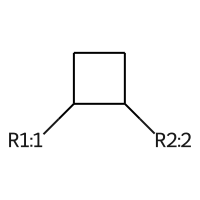
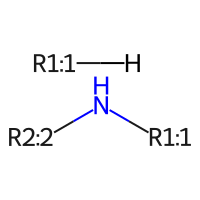
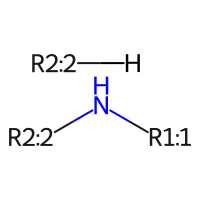
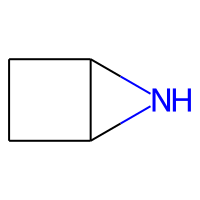

In [39]:
mols = [Chem.MolFromSmiles('C1CC2NC12')]
cores = [Chem.MolFromSmiles('C1([*:1])CCC1')]
options = RGroupDecompositionParameters()
# options.onlyMatchAtRGroups = True
cols=decomp(options)
show_decomp(cols)

In [40]:
print_rows(options)

"Core:C1CC([*:2])C1[*:1] R1:N([*:1])[*:2].[H][*:1] R2:N([*:1])[*:2].[H][*:2]",


### testRingMatching

RDKit ERROR: [08:36:01] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 


,Core,R1,mol
0,,,
1,,,
2,,,

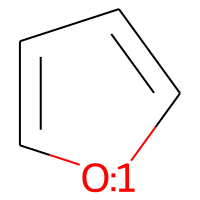
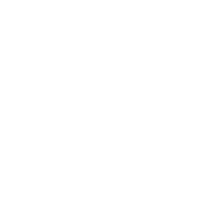
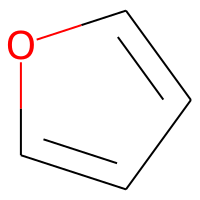
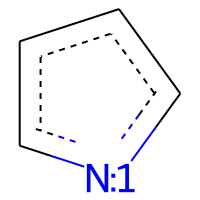
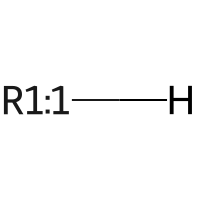
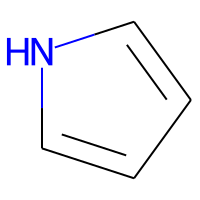
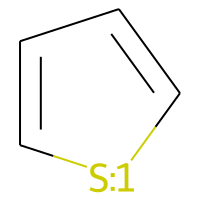
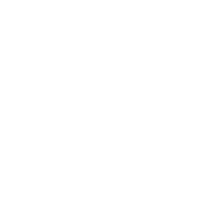
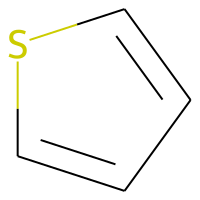

In [41]:
cores = [Chem.MolFromSmiles("c1ccc[1*]1")]
smi = ["c1cocc1", "c1c[nH]cc1", "c1cscc1"]
mols = [Chem.MolFromSmiles(s) for s in smi]
options = RGroupDecompositionParameters()
# options.onlyMatchAtRGroups = True
cols=decomp(options)
show_decomp(cols)

In [42]:
print_rows(options)

"Core:c1cc[o:1]c1",
"Core:c1cc[n:1]c1 R1:[H][*:1]",
"Core:c1cc[s:1]c1",


### testRingMatching2

,Core,R2,R3,mol
0,,,,
1,,,,
2,,,,

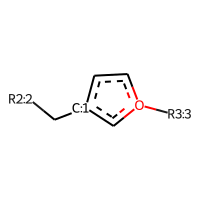
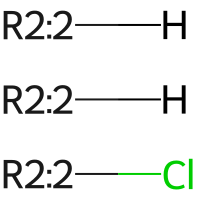
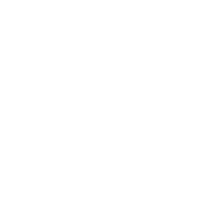
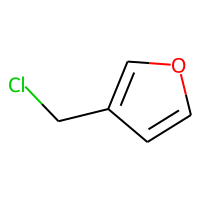
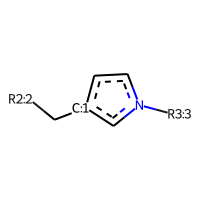
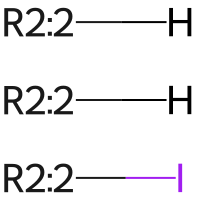
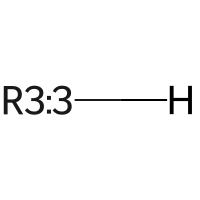
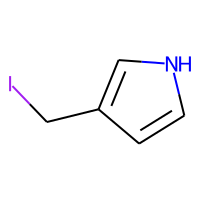
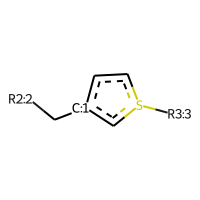
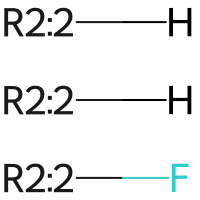
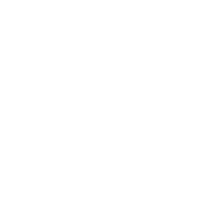
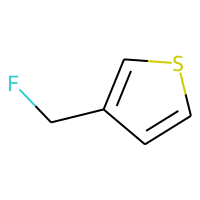

In [43]:
cores = [Chem.MolFromSmarts("*1***[*:1]1C[*:2]")]
smi = ["c1cocc1CCl", "c1c[nH]cc1CI", "c1cscc1CF"]
mols = [Chem.MolFromSmiles(s) for s in smi]
options = RGroupDecompositionParameters()
# options.onlyMatchAtRGroups = True
cols=decomp(options)
show_decomp(cols)

In [44]:
print_rows(options)

"Core:c1c[c:1](C[*:2])co1[*:3] R2:Cl[*:2].[H][*:2].[H][*:2]",
"Core:c1c[c:1](C[*:2])cn1[*:3] R2:I[*:2].[H][*:2].[H][*:2] R3:[H][*:3]",
"Core:c1c[c:1](C[*:2])cs1[*:3] R2:F[*:2].[H][*:2].[H][*:2]",


### testCoreWithRGroupAdjQuery

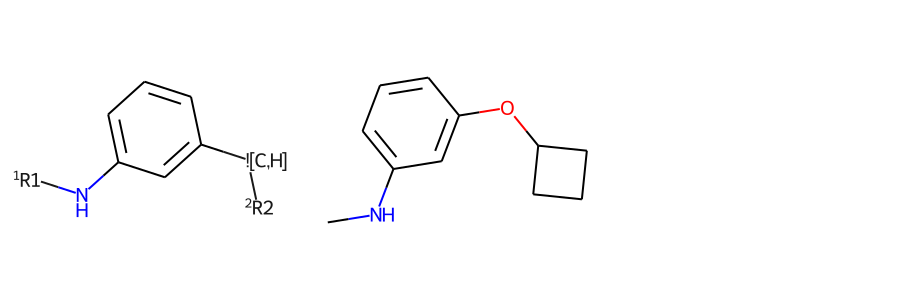

In [45]:
block = """
     RDKit          2D

 10 10  0  0  0  0  0  0  0  0999 V2000
   -3.6689   -0.8582    0.0000 R#  0  0  0  0  0  1  0  0  0  0  0  0
   -2.2421   -1.3211    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1279   -0.3169    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4403    1.1502    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3261    2.1543    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1007    1.6914    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4132    0.2243    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2989   -0.7798    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8400   -0.2386    0.0000 Q   0  0  0  0  0  0  0  0  0  0  0  0
    3.1525   -1.7057    0.0000 R#  0  0  0  0  0  1  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  7  1  0
  7  8  2  0
  7  9  1  0
  9 10  1  0
  8  3  1  0
M  RGP  2   1   1  10   2
M  END
$$$$
"""

core=Chem.MolFromMolBlock(block)
AllChem.Compute2DCoords(core)
smiles = 'CNc1cccc(c1)OC1CCC1'
cores = [core]
mols = [Chem.MolFromSmiles(smiles)]
Draw.MolsToGridImage([cores[0], mols[0]], subImgSize=(300, 300))


,Core,R1,R2,mol
0,,,,

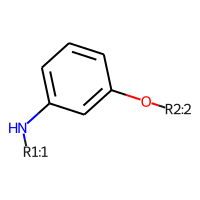
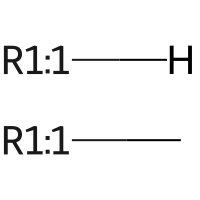
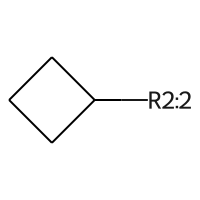
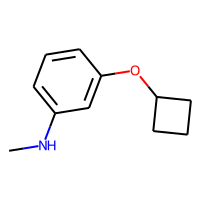

In [46]:
options = RGroupDecompositionParameters()
options.onlyMatchAtRGroups = True
cols=decomp(options)
show_decomp(cols)

In [47]:
print_rows(options)

"Core:c1cc(N[*:1])cc(O[*:2])c1 R1:C[*:1].[H][*:1] R2:C1CC([*:2])C1",


### test_userLabels

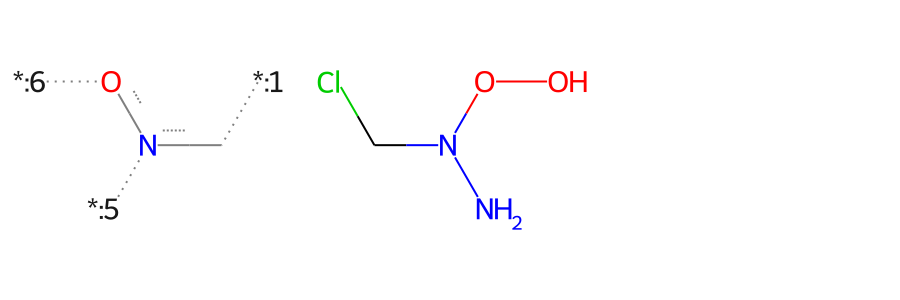

In [48]:
smi = "C(Cl)N(N)O(O)"
mols = [Chem.MolFromSmiles(smi)]
smarts = 'C([*:1])N([*:5])O([*:6])'
cores = [Chem.MolFromSmarts(smarts)]
Draw.MolsToGridImage([cores[0], mols[0]], subImgSize=(300, 300))

,Core,R1,R5,R6,mol
0,,,,,

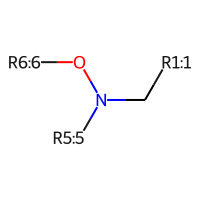
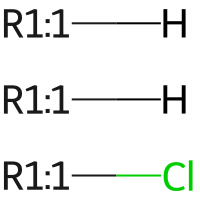
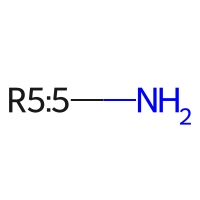
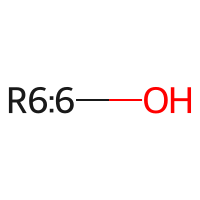
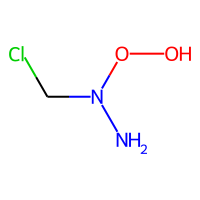

In [49]:
options = RGroupDecompositionParameters()
cols=decomp(options)
show_decomp(cols)

In [50]:
print_rows(options)

"Core:C(N(O[*:6])[*:5])[*:1] R1:Cl[*:1].[H][*:1].[H][*:1] R5:N[*:5] R6:O[*:6]",


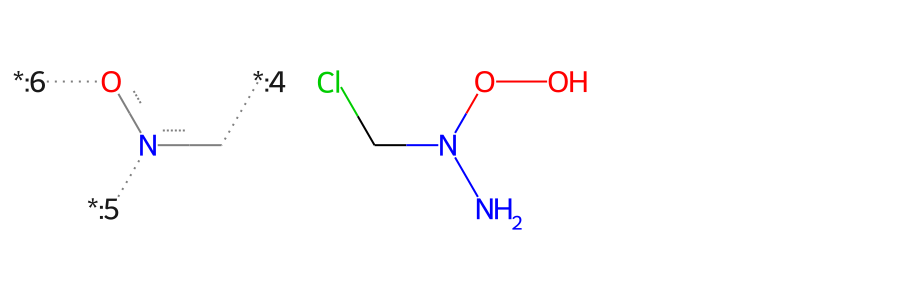

In [51]:
smarts = 'C([*:4])N([*:5])O([*:6])'
cores = [Chem.MolFromSmarts(smarts)]
Draw.MolsToGridImage([cores[0], mols[0]], subImgSize=(300, 300))

,Core,R4,R5,R6,mol
0,,,,,

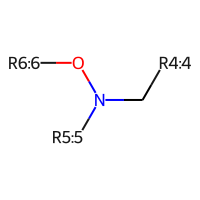
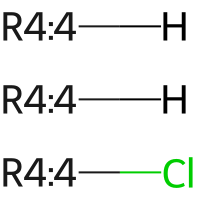
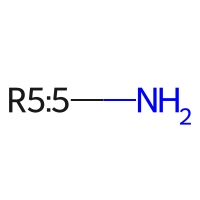
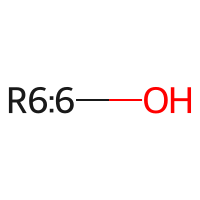
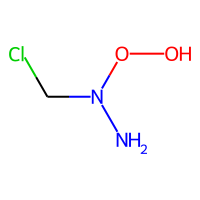

In [52]:
options = RGroupDecompositionParameters()
cols=decomp(options)
show_decomp(cols)

In [53]:
print_rows(options)

"Core:C(N(O[*:6])[*:5])[*:4] R4:Cl[*:4].[H][*:4].[H][*:4] R5:N[*:5] R6:O[*:6]",
